# Prototyping style in polar projection

In [1]:
import matplotlib.pyplot as plt
import numpy as np

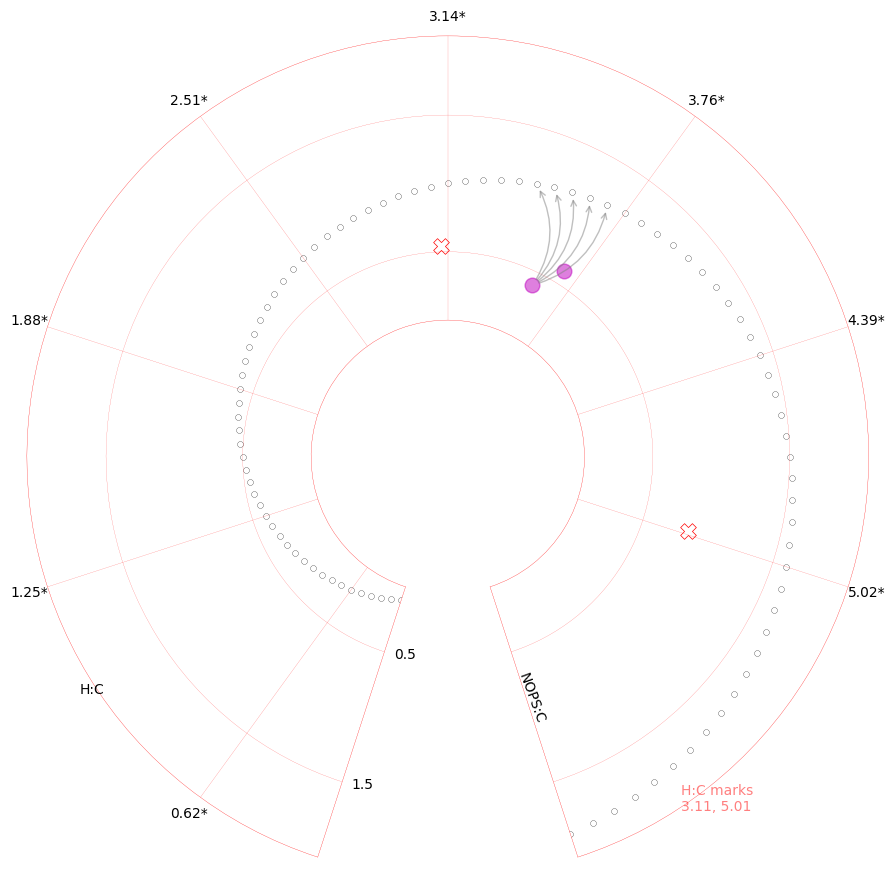

In [79]:

r = np.arange(0, 2, 0.02)
theta = np.pi * r
xticks = [np.pi*ii/5 for ii in range(1,9,1)]
xlabels = [str(ii)[:4]+'*' for ii in xticks]
_N_ = 55

outer_r = [2.5] * 10
outer_theta = np.arange(3.6, 4.6, 0.1)

fig = plt.figure(figsize=(11, 11))
ax = fig.subplots(subplot_kw={'projection': 'polar',  })
    
c = ax.scatter(theta, r, s=18,
               marker='o', facecolors='white', 
                linewidths=.2, edgecolors='k', 
               )
c2 = ax.scatter([3.6, 3.7], [0.4, 0.6], s=112, facecolors='m', alpha=.5)

center = (3.111111, 5.01007208)
ax.scatter([center[0], center[1]], [0.54, 0.84], marker='X', facecolors='w', 
                linewidths=.5, edgecolors='r', s=128)
# as legend
# ax.text(0, 3, 'X',  color='r', alpha=.5)
ax.text(5.7, 2.1, f"H:C marks\n{center[0]:.2f}, {center[1]:.2f}", color='r', alpha=.5)

# cannot get this to outsider polar spine...
# t1 = ax.plot(outer_theta, outer_r, color='r', linewidth=0.1)
ax.text(1, 2.2, "H:C", )
ax.text(1.92*np.pi, 1, "NOPS:C", rotation=290)

ax.set_theta_zero_location('S')
ax.set_theta_direction(-1)
ax.set_thetalim((0.1*np.pi, 1.9*np.pi))

for ii in range(_N_, _N_+5):
    ax.annotate("",
                xy=(3.6, 0.4), xycoords='data',
                xytext=(theta[ii], r[ii]), textcoords='data',
                arrowprops=dict(arrowstyle="<-", color="0.5", alpha=0.5,
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=-0.3",
                                ),
                )

ax.grid(color='r', linewidth=0.1)
for p in ax.spines.values():
    # inner, polar, start, end
    p.set_color('r')
    p.set_linewidth(0.2)

ax.set_rorigin(-1)
ax.set_rgrids([0.5, 1.5])

ax.set_xticks(xticks)
ax.set_xticklabels(xlabels)

plt.show()

In [ ]:

# cannot get this to outsider polar spine...

ax.annotate("H:C", xy=(4, 2), xycoords='data',
                xytext=(4, 2), textcoords='data',
                arrowprops=dict(arrowstyle="->", color="r", alpha=0.8,
                                shrinkA=5, shrinkB=5, patchA=None, patchB=None,
                                connectionstyle="arc3,rad=-0.3",
                                ),)

In [1]:
from mass2chem.formula import parse_chemformula_dict

def get_chnops_ratios(f):
    '''
    f: formula
    Returns H/C, O/C, N/C and weighted NOPS/C ratios
    '''
    _d = parse_chemformula_dict(f)
    if 'C' in _d:
        hc = _d['H']/_d['C']
        nc, oc, pc, sc  = _d.get('N', 0), _d.get('O', 0), _d.get('P', 0), _d.get('S', 0)
        nops_c = (nc*14 + oc*16 + pc*31 + sc*32) /(_d['C'] * 12)
        oc, nc = oc/_d['C'], nc/_d['C']
        return hc, oc, nc, nops_c
    else:
        return [0] * 4

In [2]:
get_chnops_ratios('C26H43NO5')

(1.6538461538461537,
 0.19230769230769232,
 0.038461538461538464,
 0.30128205128205127)

In [ ]:
import networkx as nx

In [ ]:
pathway_nodes, pathway_edges = [model['Compounds'][x] for x in P['cpds']], P['edges']
pathway_nodes, pathway_edges = calculate_clean_network(
    pathway_nodes, pathway_edges, formula='charged_formula')
hcList = [x['ratio_H_C'] for x in pathway_nodes]
cartesian_mean_x, cartesian_min_x, cartesian_max_x = np.mean(hcList), min(hcList), max(1, max(hcList))
hcList = project_hc_data_radial(hcList)
yList = [min(max(x['ratio_NOPS'], 0), 2.5) 
             for x in pathway_nodes]

posDict = {}
for ii in range(len(pathway_nodes)):
    posDict[pathway_nodes[ii]['id']] = (hcList[ii], yList[ii])



position = nx_fruchterman_reingold(pathway_edges, posDict)  # hcList, yList,
